# Regresión polinómica:

Se crean datos sintéticos para realizar la regrresión a un polinomio.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
def mean_squared_error(y_true, y_pred):
  n = len(y_true)
  mse = sum((float(yt) - float(yp)) ** 2 for yt, yp in zip(y_true, y_pred)) / n
  return mse

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    return rmse

def mean_absolute_error(y_true, y_pred):
    n = len(y_true)
    mae = sum(abs(yt - yp) for yt, yp in zip(y_true, y_pred)) / n
    return mae

def r2_score(y_true, y_pred):
    mean_y_true = sum(y_true) / len(y_true)
    ss_total = sum((yt - mean_y_true) ** 2 for yt in y_true)
    ss_res = sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred))
    r2 = 1 - (ss_res / ss_total)
    return r2

Text(0.5, 1.0, 'Dataset generado')

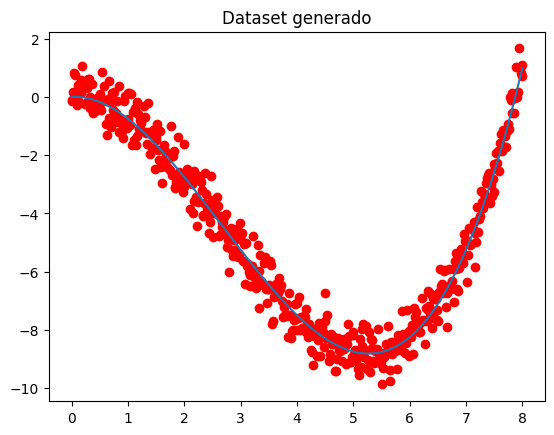

In [9]:
x_data = np.linspace(0,8,500) # datos en X
y_data = 0.125*x_data**3 - x_data**2 + 0.125*x_data  # polinomio con los datos (cúbico)
y_data2 = np.random.normal(0,0.50,500) + y_data
plt.scatter(x_data, y_data2, c='r', )
plt.plot(x_data, y_data) # graficar los datos
plt.title("Dataset generado")

Para la regresión con un polinomio, se necesita preprocesar los datos `x_data` para que modelen un polinomio del grado indicado. Esto es, crear la matriz A para resolver el problema de la forma $Ax = b$, las dimensiones de la matriz A son de $m\times m$ siendo m el grado del polinomio.


**Ejercicio en clase/casa**: Variar el grado del polinomio. Los datos corresponden a un polinomio de tercer grado, Se puede apreciar que con grados inferiores, los datos van a tener un mal ajuste, y con grados superiores puede existir sobre entrenamiento, por ejemplo desde grado 20 se empiezan a notar problemas de ajuste.

# Grado 1

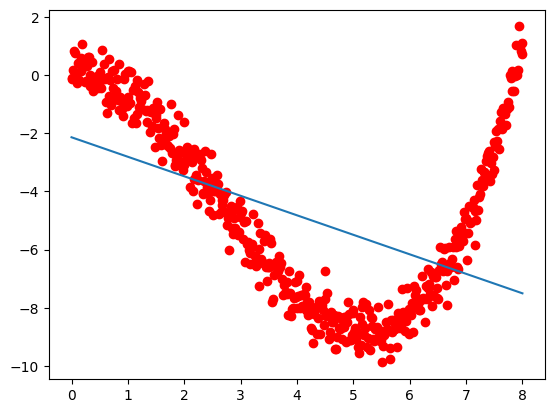

In [10]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=1)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [11]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 7.71259884876356
RMSE: 2.7771566122139313
MAE: 2.29034183265385
R2: 0.2379186432806878


In [12]:
df= pd.DataFrame(data=[[mse,rmse,mae,r2,1]], columns=['MSE','RMSE','MAE','R2','Grado'])
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1


Text(0.5, 1.0, 'histograma de las diferencias')

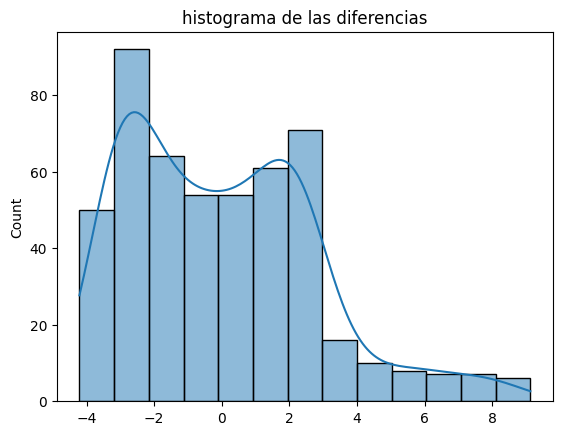

In [13]:
import seaborn as sns
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

# Grado 2

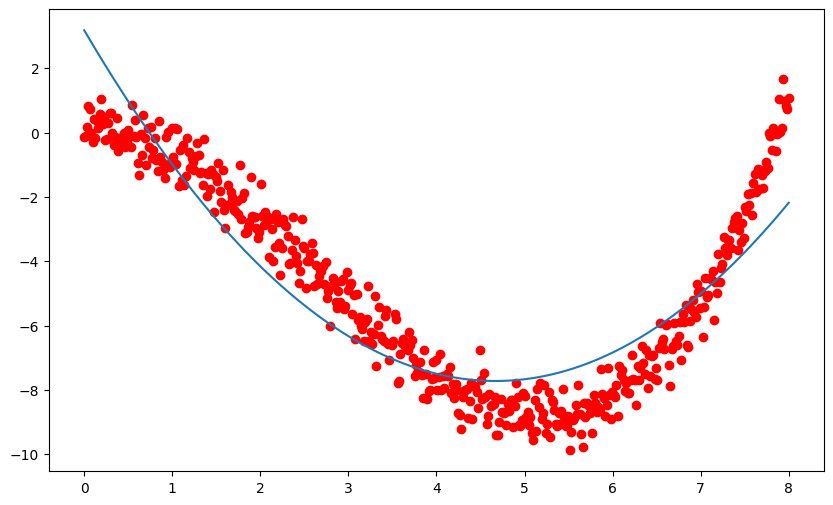

In [14]:
poly_regressor = PolynomialFeatures(degree=2)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [15]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 1.701234115755739
RMSE: 1.3043136569689588
MAE: 1.0945555215061393
R2: 0.8319011751479649


In [18]:
df.loc[len(df)] = [mse, rmse, mae, r2, 2]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0


Text(0.5, 1.0, 'histograma de las diferencias')

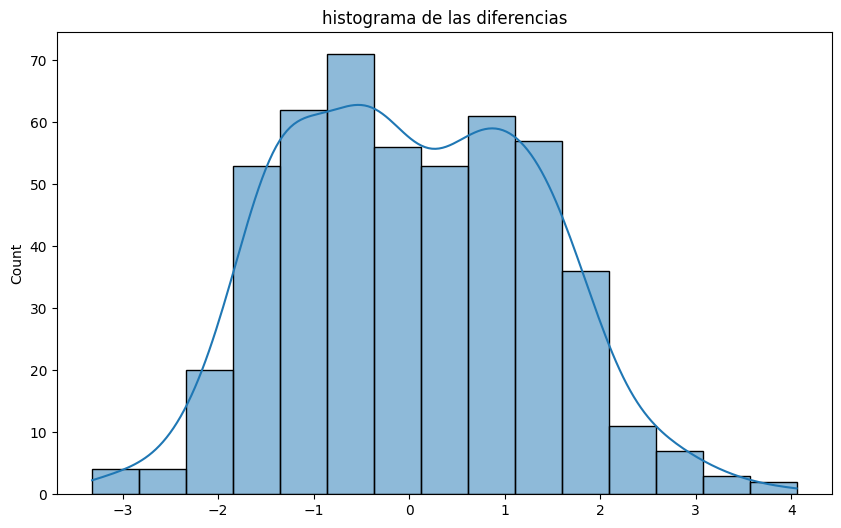

In [19]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")


# Grado 3

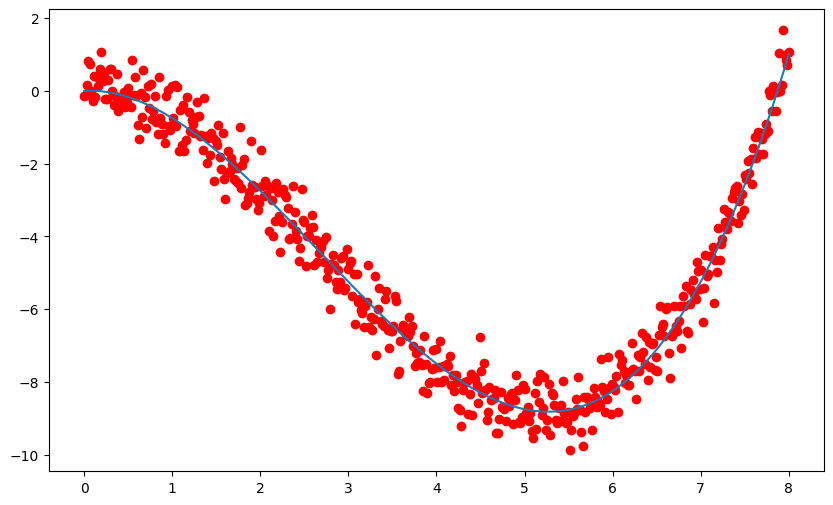

In [20]:
poly_regressor = PolynomialFeatures(degree=3)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [21]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.25858838066713113
RMSE: 0.5085158607822682
MAE: 0.40573533683915464
R2: 0.974448900061456


In [23]:
df.loc[len(df)] = [mse, rmse, mae, r2, 3]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0


Text(0.5, 1.0, 'histograma de las diferencias')

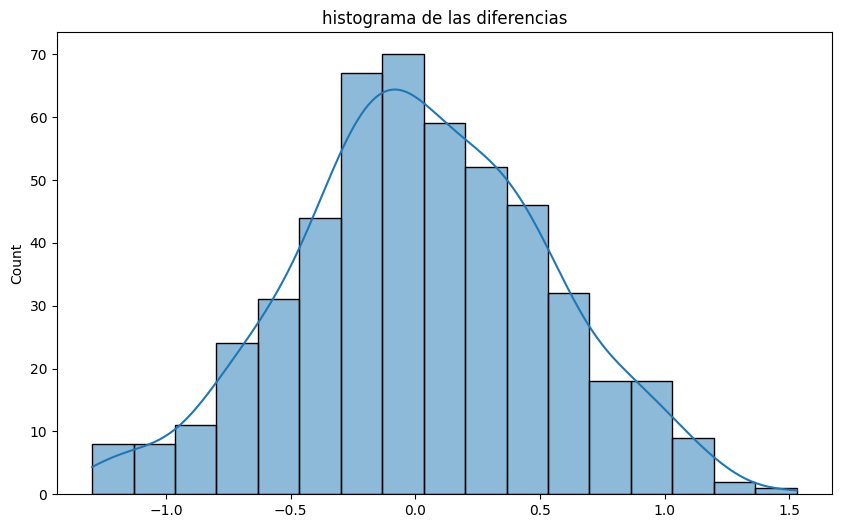

In [24]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

# Grado 4

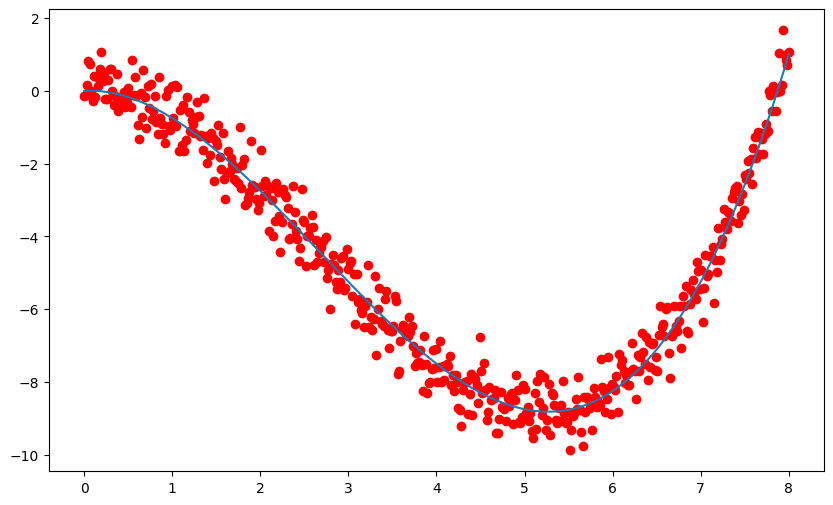

In [25]:
poly_regressor = PolynomialFeatures(degree=4)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [26]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.25858838066713075
RMSE: 0.5085158607822677
MAE: 0.405735336839155
R2: 0.974448900061456


In [27]:
df.loc[len(df)] = [mse, rmse, mae, r2, 4]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0


Text(0.5, 1.0, 'histograma de las diferencias')

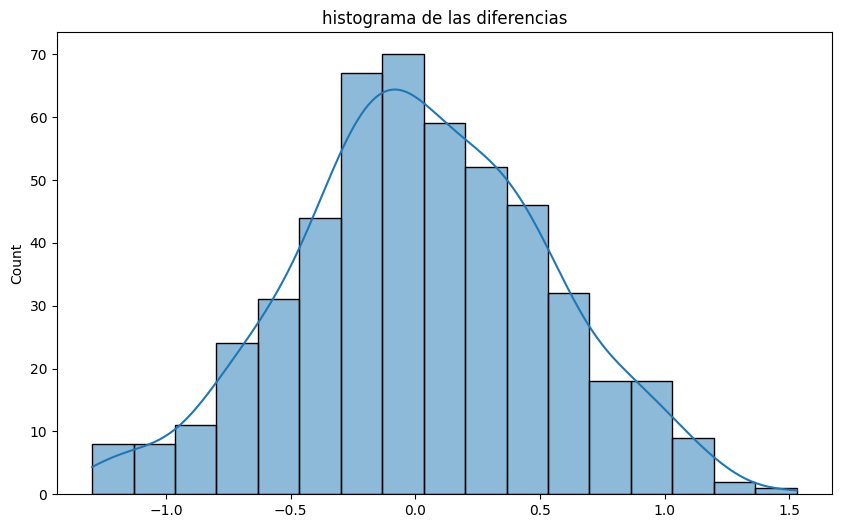

In [28]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

### Se evidencia que no hay gran cambio del grado 3 al 4

# Grado 5

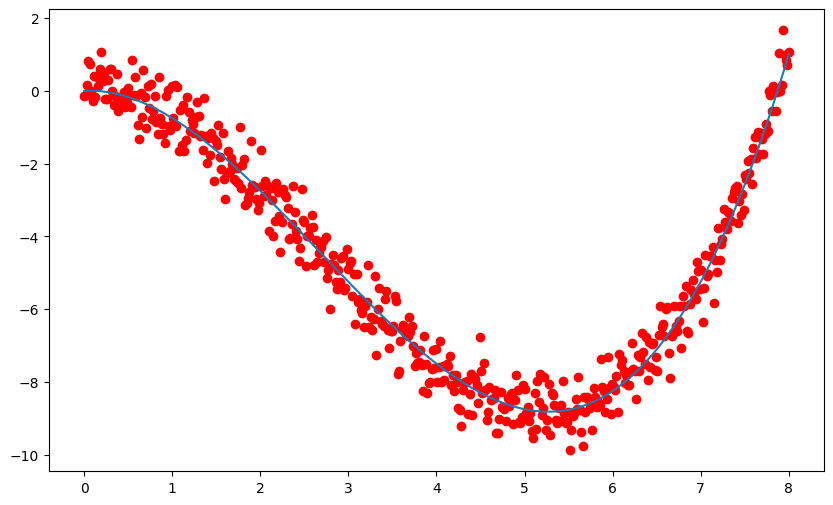

In [29]:
poly_regressor = PolynomialFeatures(degree=5)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [30]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.2585883806671261
RMSE: 0.5085158607822632
MAE: 0.40573533683915297
R2: 0.9744489000614565


In [31]:
df.loc[len(df)] = [mse, rmse, mae, r2, 5]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0


Text(0.5, 1.0, 'histograma de las diferencias')

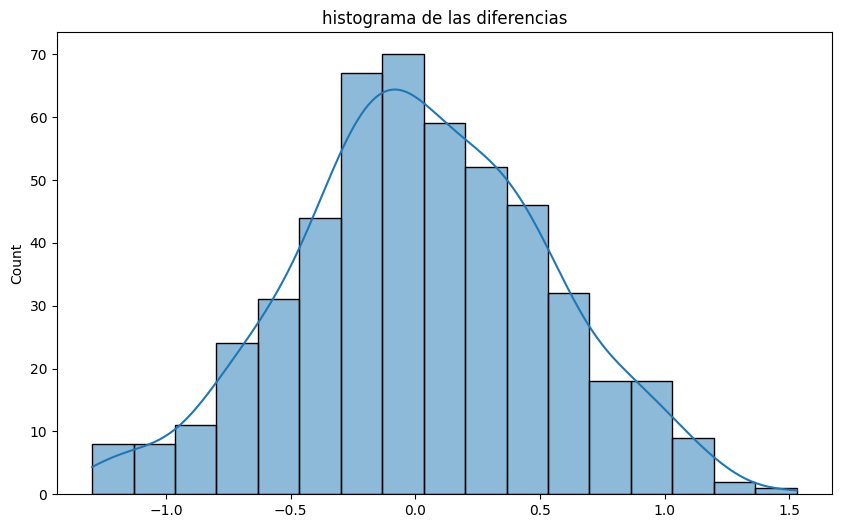

In [32]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

### Se sigue evidenciando que no hay variación en las métricas del modelo.

# Grado 6

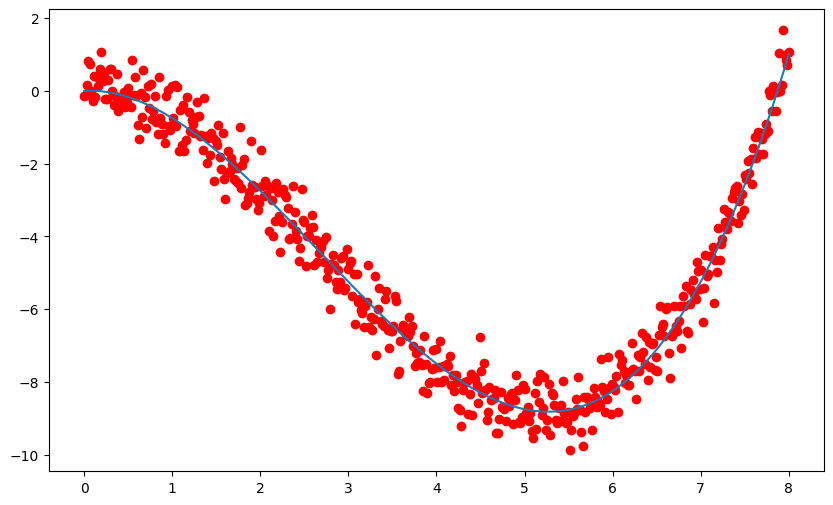

In [33]:
poly_regressor = PolynomialFeatures(degree=6)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [34]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.2585883806671461
RMSE: 0.508515860782283
MAE: 0.4057353368391554
R2: 0.9744489000614545


In [35]:
df.loc[len(df)] = [mse, rmse, mae, r2, 6]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0


Text(0.5, 1.0, 'histograma de las diferencias')

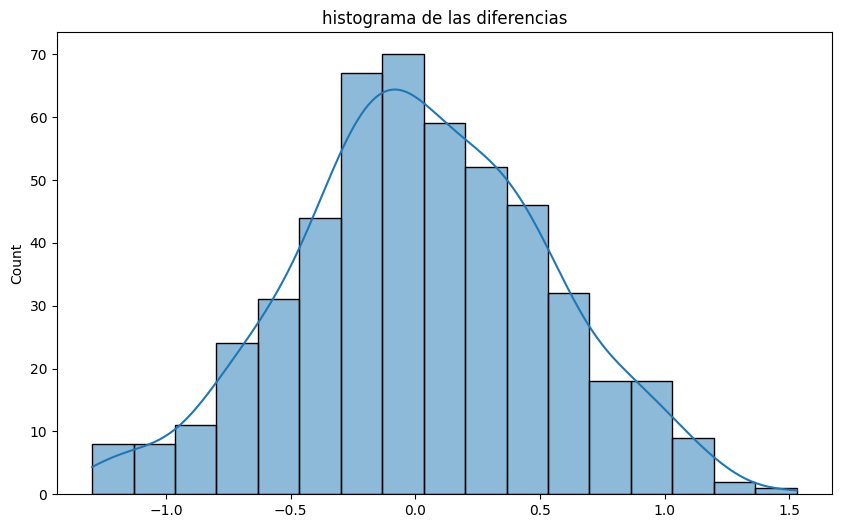

In [36]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

### Aún no se evidencia cambio

# Grado 7

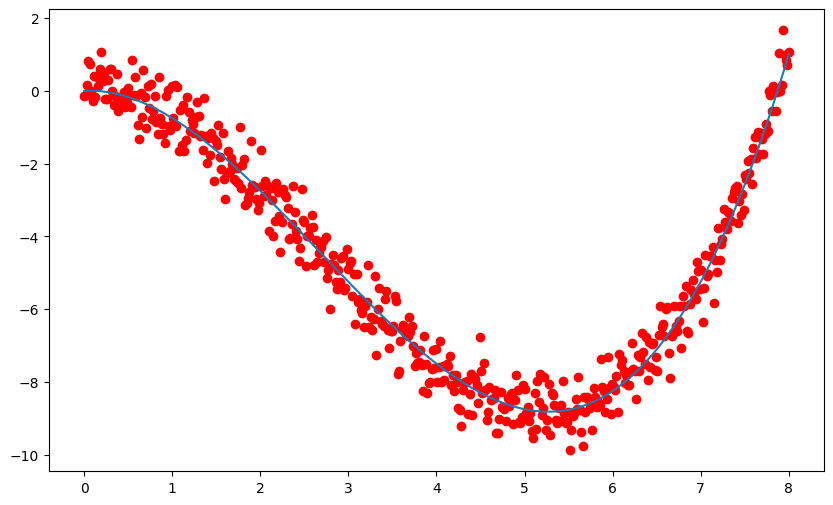

In [37]:
poly_regressor = PolynomialFeatures(degree=7)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [39]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.2585883806678983
RMSE: 0.5085158607830225
MAE: 0.405735336839463
R2: 0.9744489000613802


In [40]:
df.loc[len(df)] = [mse, rmse, mae, r2, 7]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0
6,0.258588,0.508516,0.405735,0.974449,7.0


Text(0.5, 1.0, 'histograma de las diferencias')

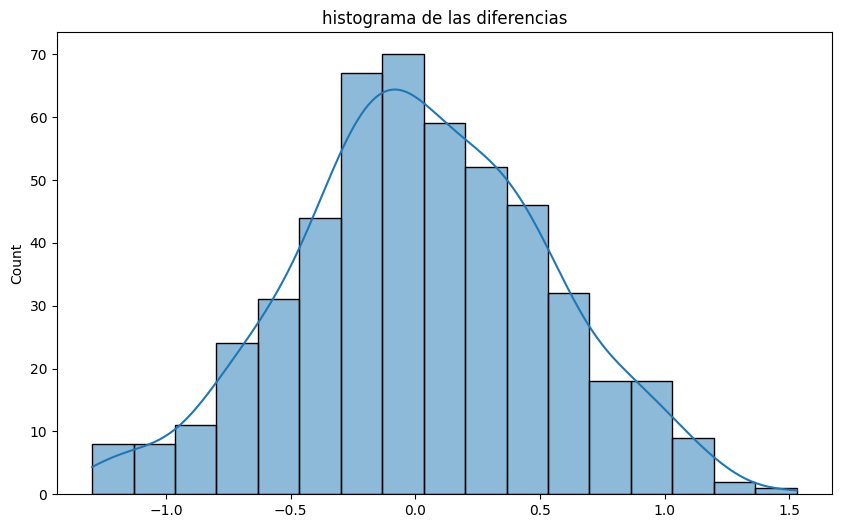

In [41]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

### Continua el mismo comportamiento

# Grado 8

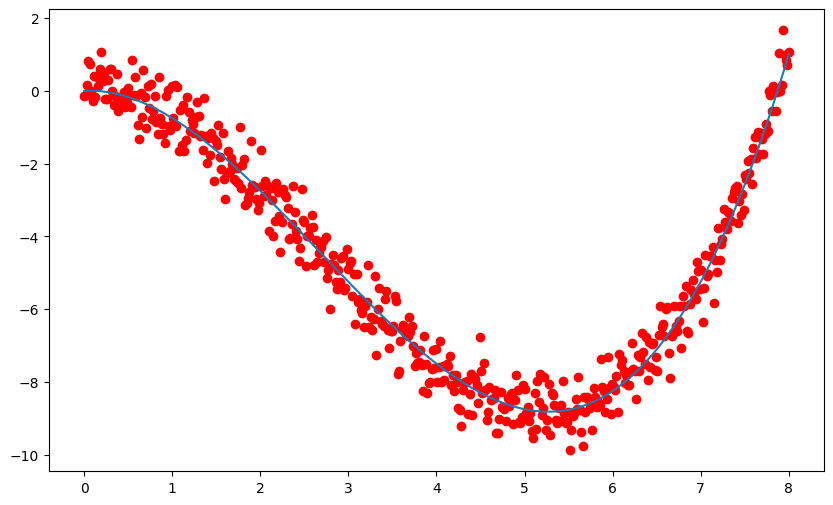

In [42]:
poly_regressor = PolynomialFeatures(degree=8)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [43]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.2585883806708312
RMSE: 0.5085158607859063
MAE: 0.4057353368408219
R2: 0.9744489000610904


Text(0.5, 1.0, 'histograma de las diferencias')

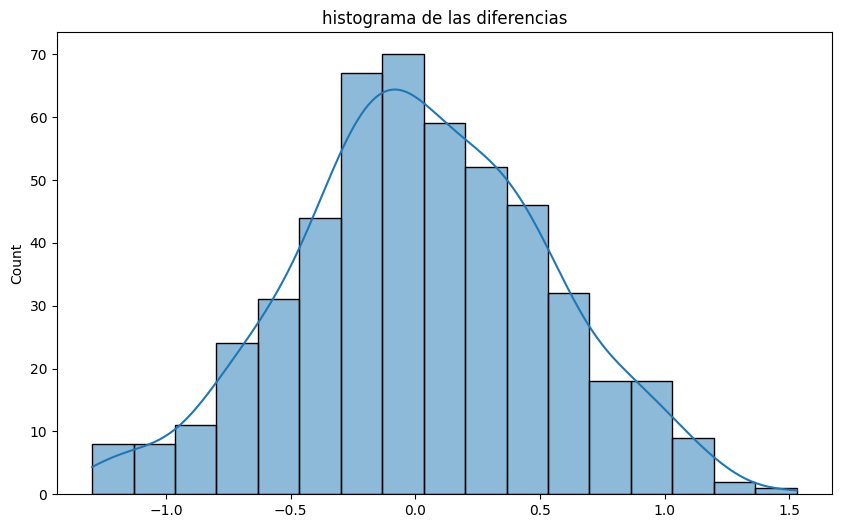

In [44]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [45]:
df.loc[len(df)] = [mse, rmse, mae, r2, 8]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0
6,0.258588,0.508516,0.405735,0.974449,7.0
7,0.258588,0.508516,0.405735,0.974449,8.0


### Sigue sin variación

# Grado 9

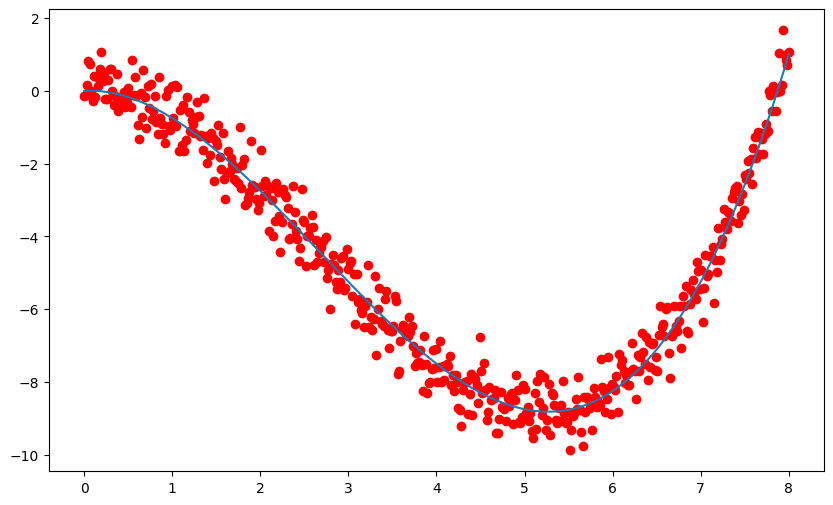

In [46]:
poly_regressor = PolynomialFeatures(degree=9)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [47]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.25858838069222595
RMSE: 0.5085158608069428
MAE: 0.40573533684801033
R2: 0.9744489000589763


Text(0.5, 1.0, 'histograma de las diferencias')

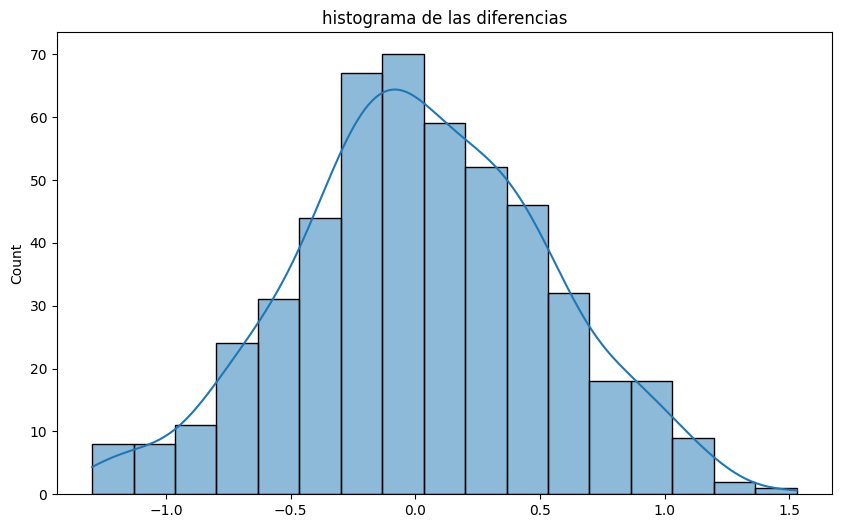

In [48]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [49]:
df.loc[len(df)] = [mse, rmse, mae, r2, 9]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0
6,0.258588,0.508516,0.405735,0.974449,7.0
7,0.258588,0.508516,0.405735,0.974449,8.0
8,0.258588,0.508516,0.405735,0.974449,9.0


### Continua sin cambios

# Grado 10

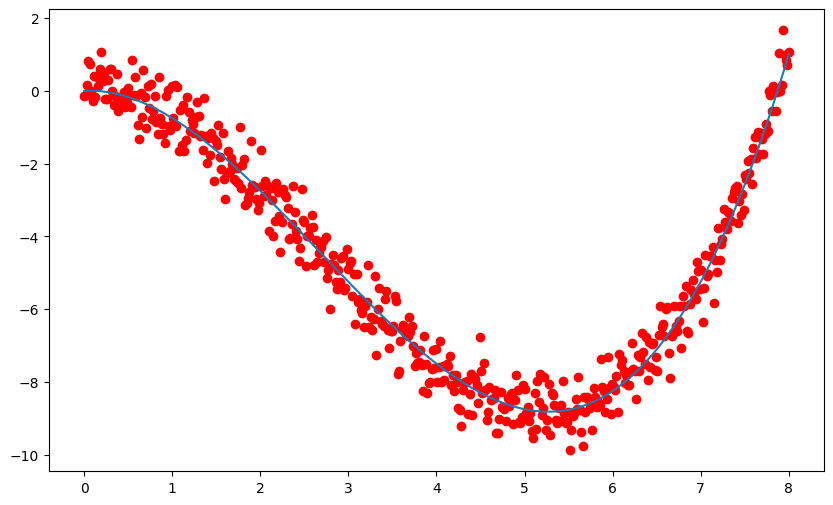

In [50]:
poly_regressor = PolynomialFeatures(degree=10)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [52]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.2585883810317186
RMSE: 0.5085158611407501
MAE: 0.4057353369934186
R2: 0.9744489000254312


Text(0.5, 1.0, 'histograma de las diferencias')

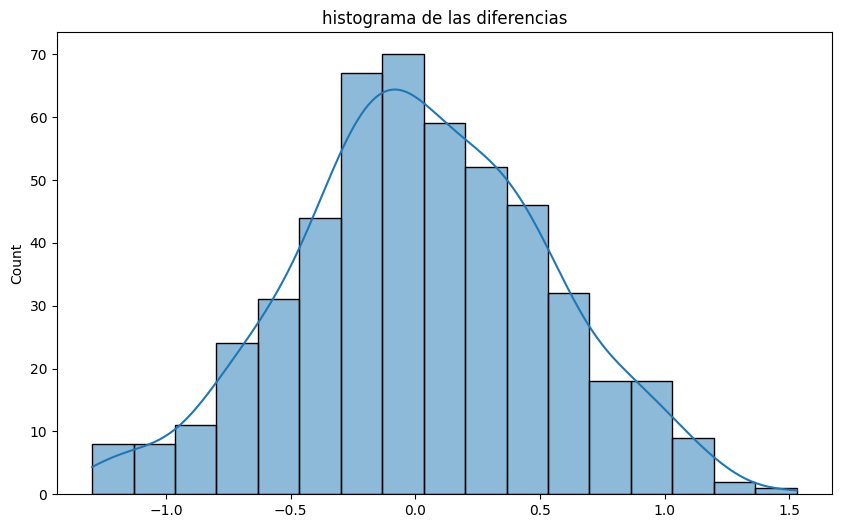

In [53]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [54]:
df.loc[len(df)] = [mse, rmse, mae, r2, 10]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0
6,0.258588,0.508516,0.405735,0.974449,7.0
7,0.258588,0.508516,0.405735,0.974449,8.0
8,0.258588,0.508516,0.405735,0.974449,9.0
9,0.258588,0.508516,0.405735,0.974449,10.0


### Sigue sin variar

# Grado 11

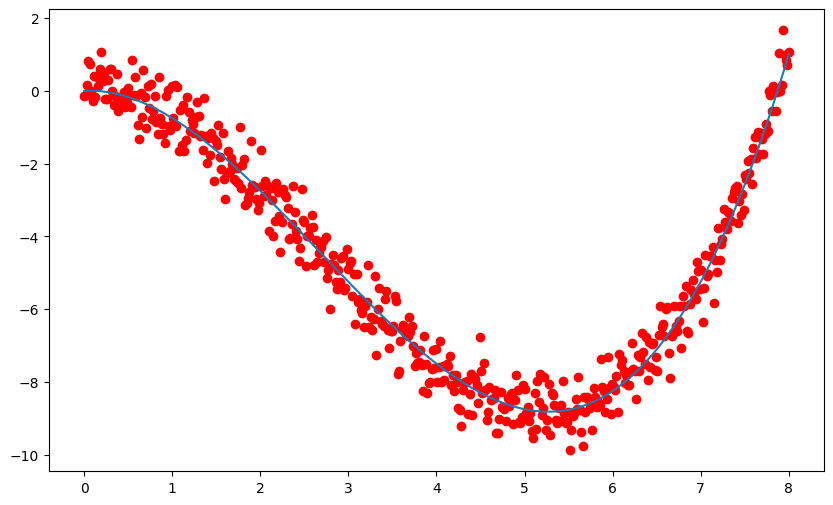

In [55]:
poly_regressor = PolynomialFeatures(degree=11)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [56]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.2585883800088206
RMSE: 0.5085158601349821
MAE: 0.4057353366950391
R2: 0.9744489001265036


Text(0.5, 1.0, 'histograma de las diferencias')

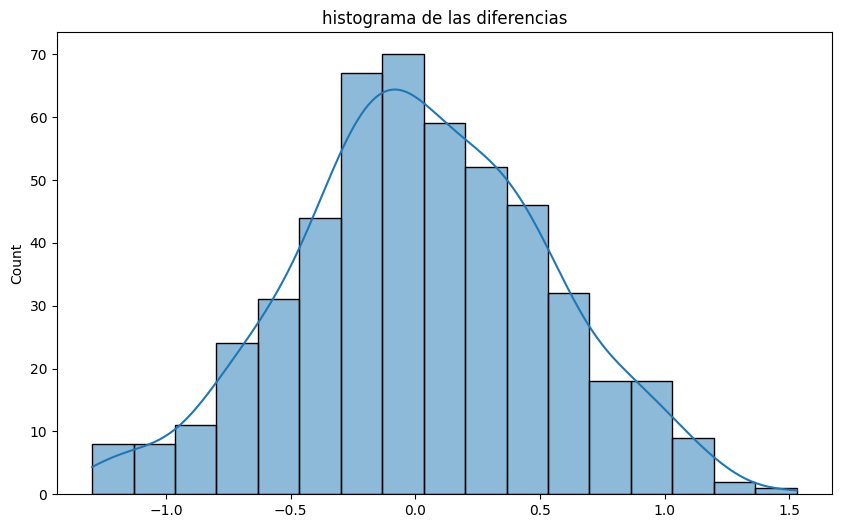

In [57]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [58]:
df.loc[len(df)] = [mse, rmse, mae, r2, 11]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0
6,0.258588,0.508516,0.405735,0.974449,7.0
7,0.258588,0.508516,0.405735,0.974449,8.0
8,0.258588,0.508516,0.405735,0.974449,9.0
9,0.258588,0.508516,0.405735,0.974449,10.0


### sigue sin presentar variación

# Grado 12

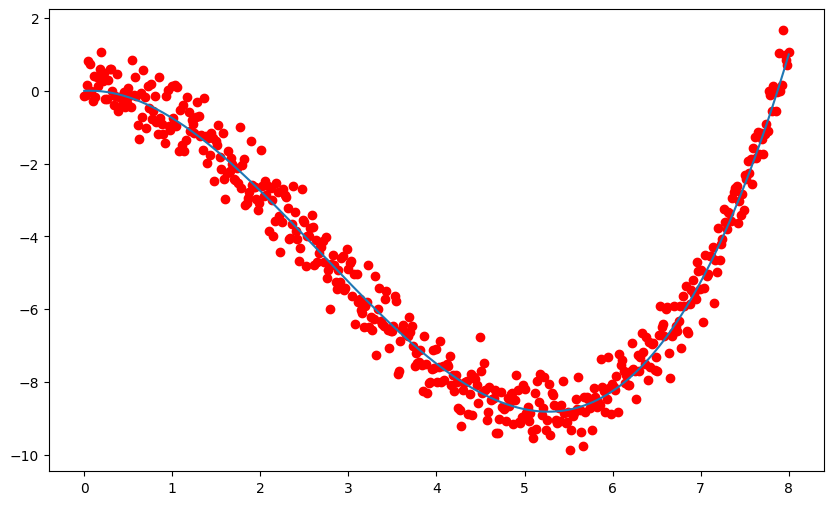

In [59]:
poly_regressor = PolynomialFeatures(degree=12)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [60]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.2585883624105405
RMSE: 0.5085158428314112
MAE: 0.405735326692626
R2: 0.9744489018653885


Text(0.5, 1.0, 'histograma de las diferencias')

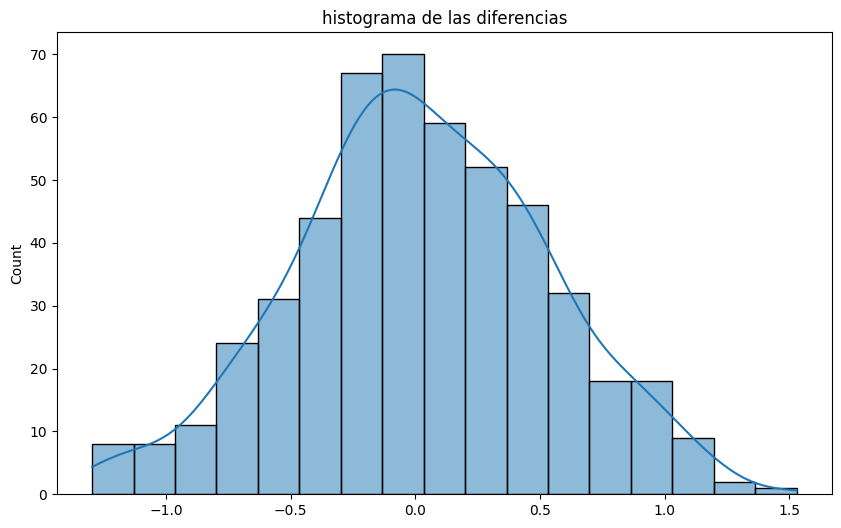

In [61]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [62]:
df.loc[len(df)] = [mse, rmse, mae, r2, 12]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0
6,0.258588,0.508516,0.405735,0.974449,7.0
7,0.258588,0.508516,0.405735,0.974449,8.0
8,0.258588,0.508516,0.405735,0.974449,9.0
9,0.258588,0.508516,0.405735,0.974449,10.0


### No hay variación notoria

# Grado 13

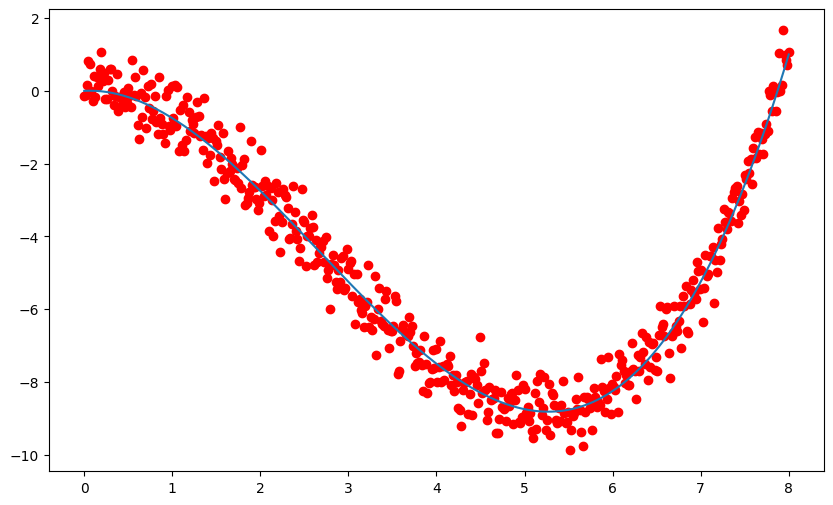

In [64]:
poly_regressor = PolynomialFeatures(degree=13)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [65]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.25858842651748337
RMSE: 0.5085159058647855
MAE: 0.4057353607964274
R2: 0.9744488955309859


Text(0.5, 1.0, 'histograma de las diferencias')

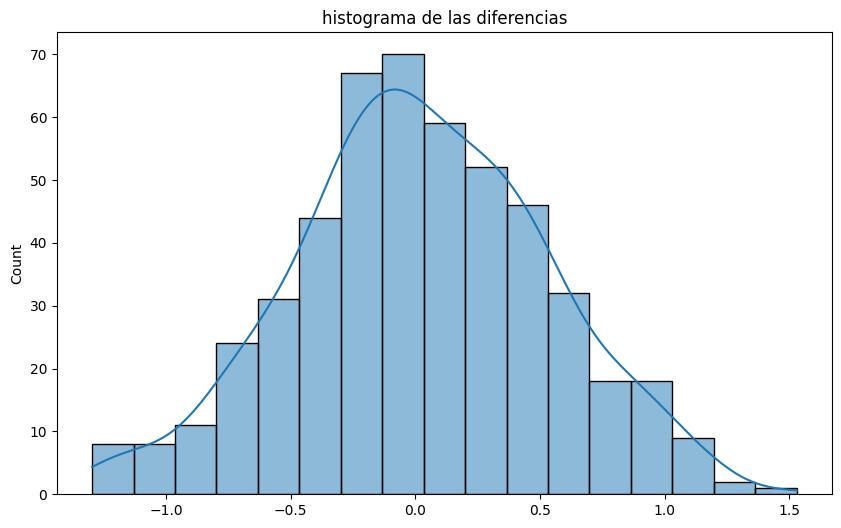

In [66]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [67]:
df.loc[len(df)] = [mse, rmse, mae, r2, 13]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0
6,0.258588,0.508516,0.405735,0.974449,7.0
7,0.258588,0.508516,0.405735,0.974449,8.0
8,0.258588,0.508516,0.405735,0.974449,9.0
9,0.258588,0.508516,0.405735,0.974449,10.0


### Sigue sin variar

# Grado 14

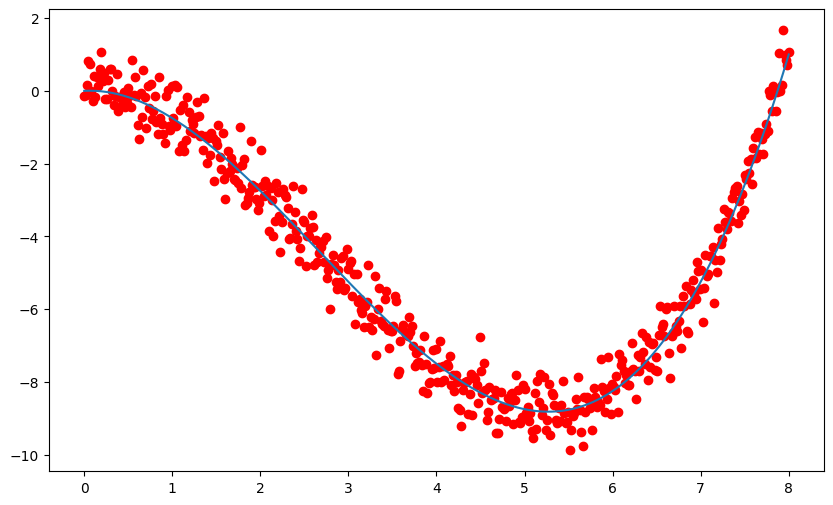

In [68]:
poly_regressor = PolynomialFeatures(degree=14)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [69]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.2585898354677316
RMSE: 0.5085172912180388
MAE: 0.4057368155598206
R2: 0.9744487563127097


Text(0.5, 1.0, 'histograma de las diferencias')

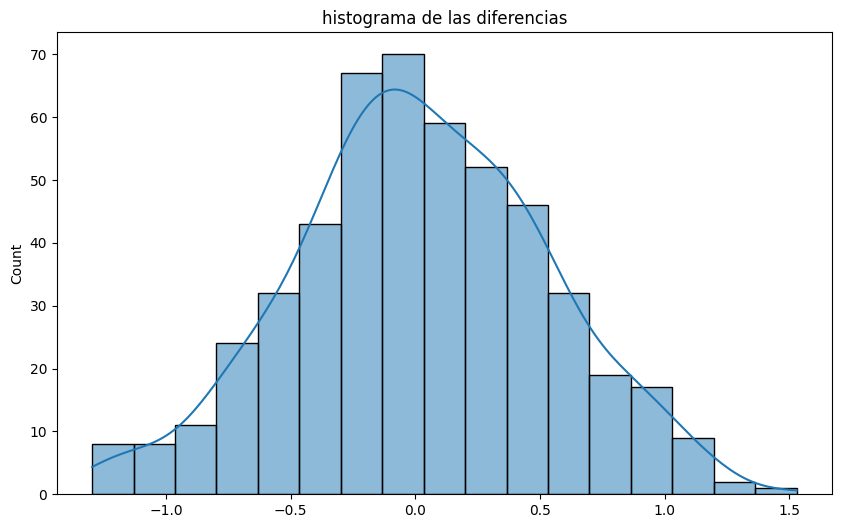

In [70]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [71]:
df.loc[len(df)] = [mse, rmse, mae, r2, 14]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0
6,0.258588,0.508516,0.405735,0.974449,7.0
7,0.258588,0.508516,0.405735,0.974449,8.0
8,0.258588,0.508516,0.405735,0.974449,9.0
9,0.258588,0.508516,0.405735,0.974449,10.0


### Se empieza a notar una leve variación en las métricas de MSE	RMSE	MAE

# Grado 15

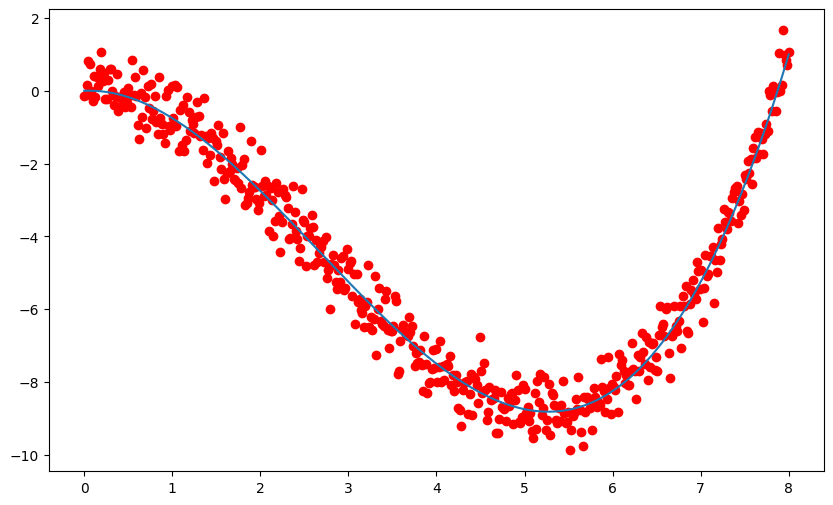

In [72]:
poly_regressor = PolynomialFeatures(degree=15)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [73]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.2585961647212298
RMSE: 0.5085235144231088
MAE: 0.4057536021768023
R2: 0.974448130919611


Text(0.5, 1.0, 'histograma de las diferencias')

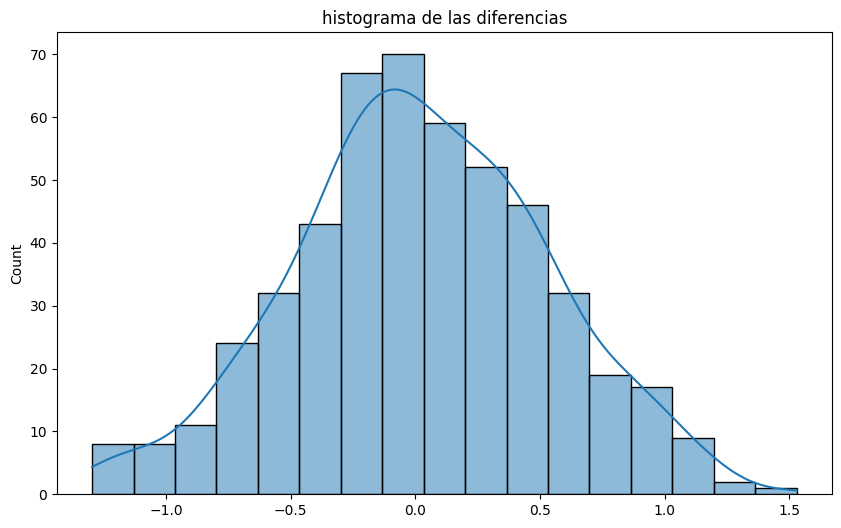

In [74]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [75]:
df.loc[len(df)] = [mse, rmse, mae, r2, 15]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0
6,0.258588,0.508516,0.405735,0.974449,7.0
7,0.258588,0.508516,0.405735,0.974449,8.0
8,0.258588,0.508516,0.405735,0.974449,9.0
9,0.258588,0.508516,0.405735,0.974449,10.0


### Al igual que el anterior empieza a notarse más la variación en las métricas MSE	RMSE	MAE

# Grado 16

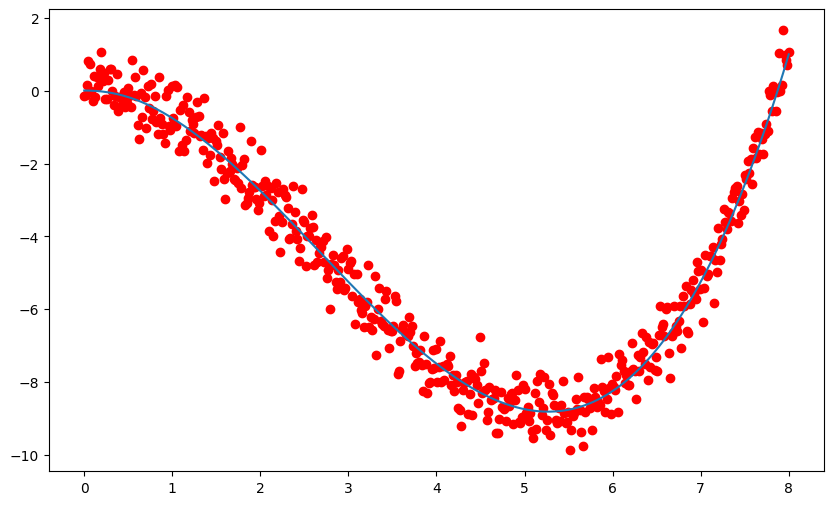

In [76]:
poly_regressor = PolynomialFeatures(degree=16)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [78]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.2586695064636054
RMSE: 0.5085956217503307
MAE: 0.4058283054416046
R2: 0.9744408840271394


Text(0.5, 1.0, 'histograma de las diferencias')

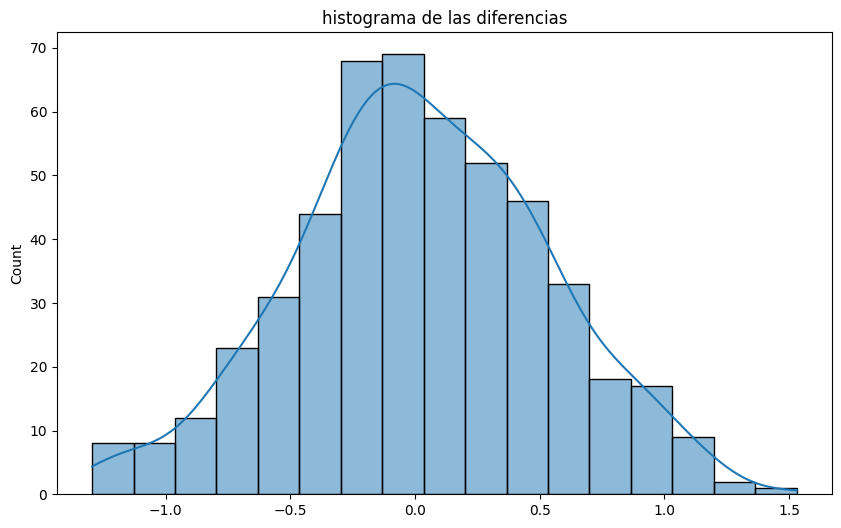

In [79]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [80]:
df.loc[len(df)] = [mse, rmse, mae, r2, 16]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0
6,0.258588,0.508516,0.405735,0.974449,7.0
7,0.258588,0.508516,0.405735,0.974449,8.0
8,0.258588,0.508516,0.405735,0.974449,9.0
9,0.258588,0.508516,0.405735,0.974449,10.0


### Continua variando levemente

# Grado 17

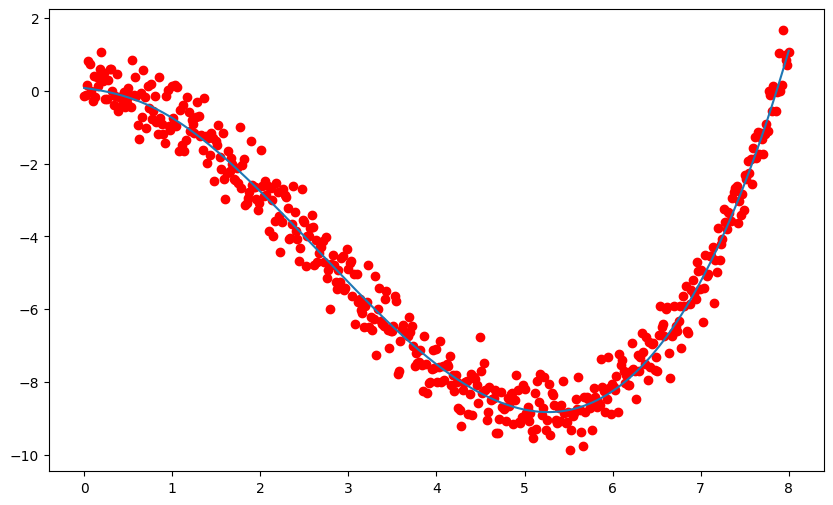

In [81]:
poly_regressor = PolynomialFeatures(degree=17)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [82]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.2566880635470156
RMSE: 0.5066439218494737
MAE: 0.40501595539381885
R2: 0.9746366702641454


Text(0.5, 1.0, 'histograma de las diferencias')

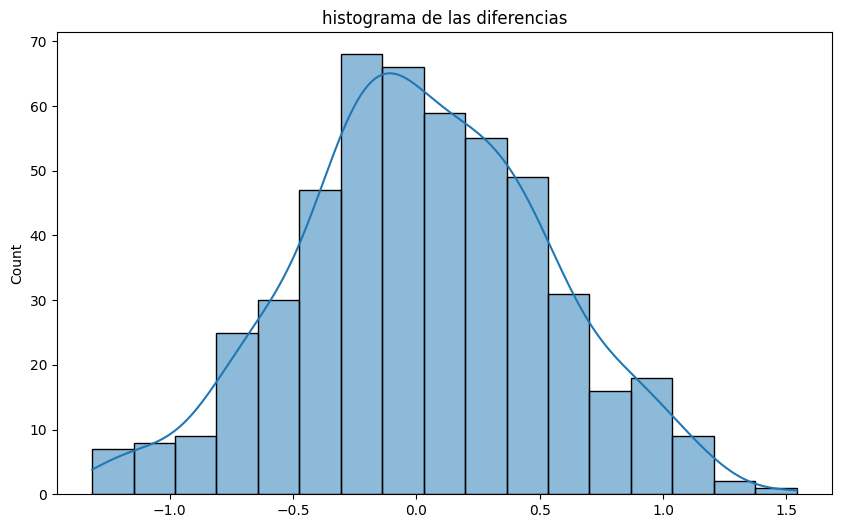

In [83]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [84]:
df.loc[len(df)] = [mse, rmse, mae, r2, 17]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0
6,0.258588,0.508516,0.405735,0.974449,7.0
7,0.258588,0.508516,0.405735,0.974449,8.0
8,0.258588,0.508516,0.405735,0.974449,9.0
9,0.258588,0.508516,0.405735,0.974449,10.0


### Sigue variando levemente

# Grado 18

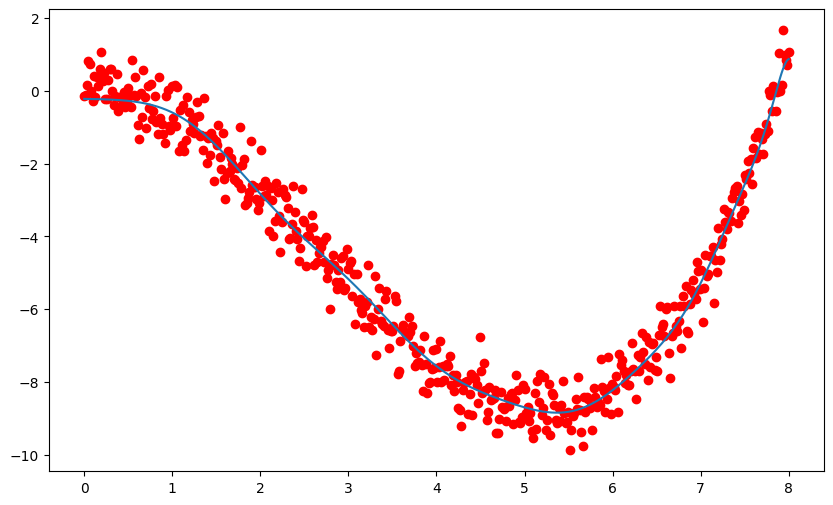

In [85]:
poly_regressor = PolynomialFeatures(degree=18)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [86]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.2648197743452166
RMSE: 0.5146064266458558
MAE: 0.4107991880259405
R2: 0.9738331764848034


Text(0.5, 1.0, 'histograma de las diferencias')

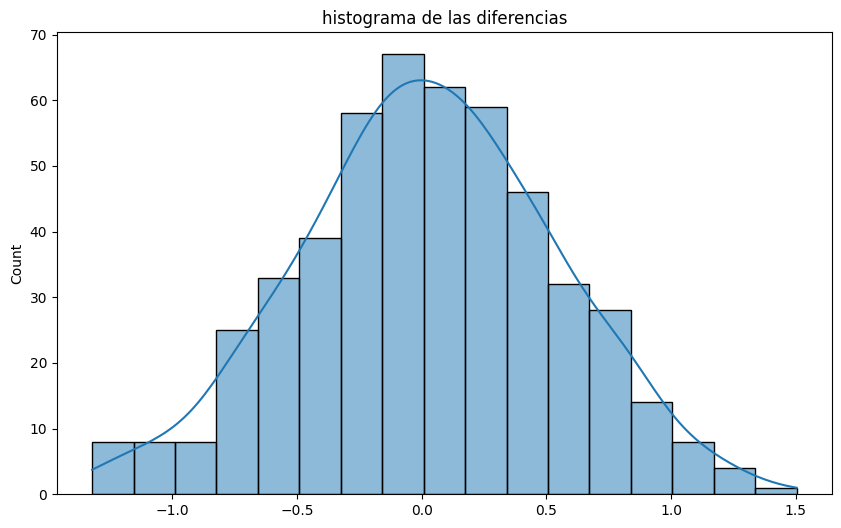

In [87]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [88]:
df.loc[len(df)] = [mse, rmse, mae, r2, 18]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0
6,0.258588,0.508516,0.405735,0.974449,7.0
7,0.258588,0.508516,0.405735,0.974449,8.0
8,0.258588,0.508516,0.405735,0.974449,9.0
9,0.258588,0.508516,0.405735,0.974449,10.0


### Sigue variando levemente

# Grado 19

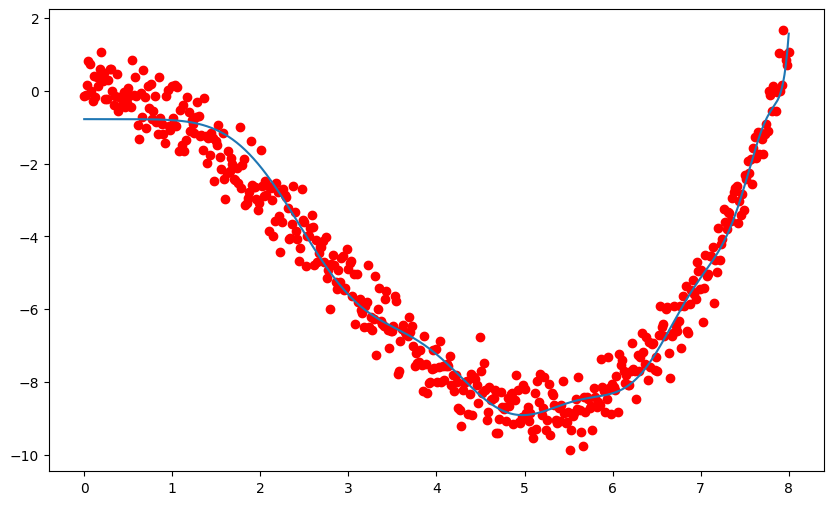

In [89]:
poly_regressor = PolynomialFeatures(degree=19)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [90]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.40077110249528025
RMSE: 0.6330648485702552
MAE: 0.5042691339183392
R2: 0.9603998351901238


Text(0.5, 1.0, 'histograma de las diferencias')

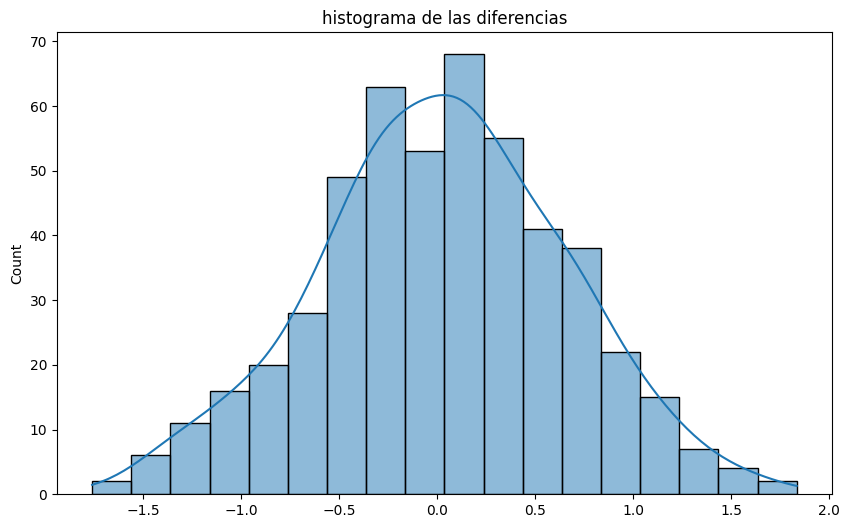

In [91]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [92]:
df.loc[len(df)] = [mse, rmse, mae, r2, 19]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0
6,0.258588,0.508516,0.405735,0.974449,7.0
7,0.258588,0.508516,0.405735,0.974449,8.0
8,0.258588,0.508516,0.405735,0.974449,9.0
9,0.258588,0.508516,0.405735,0.974449,10.0


### Se empieza a notar pérdida de calidad del modelo a la hora de hacer las predicciones, indica señales de sobre ajuste

# Grado 20

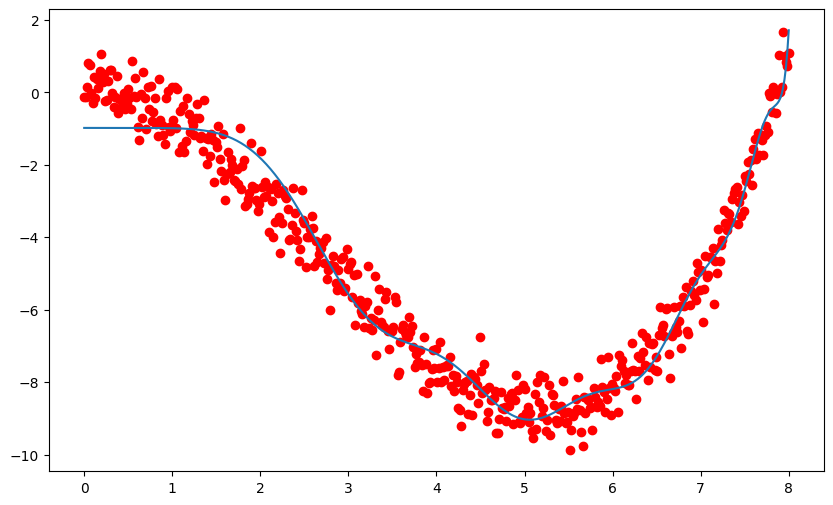

In [93]:
poly_regressor = PolynomialFeatures(degree=20)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [94]:
mse = mean_squared_error(y_data2, y_pred)
rmse = root_mean_squared_error(y_data2, y_pred)
mae = mean_absolute_error(y_data2, y_pred)
r2 = r2_score(y_data2, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.49012961870897354
RMSE: 0.7000925786701166
MAE: 0.5518491710145309
R2: 0.9515703264076889


Text(0.5, 1.0, 'histograma de las diferencias')

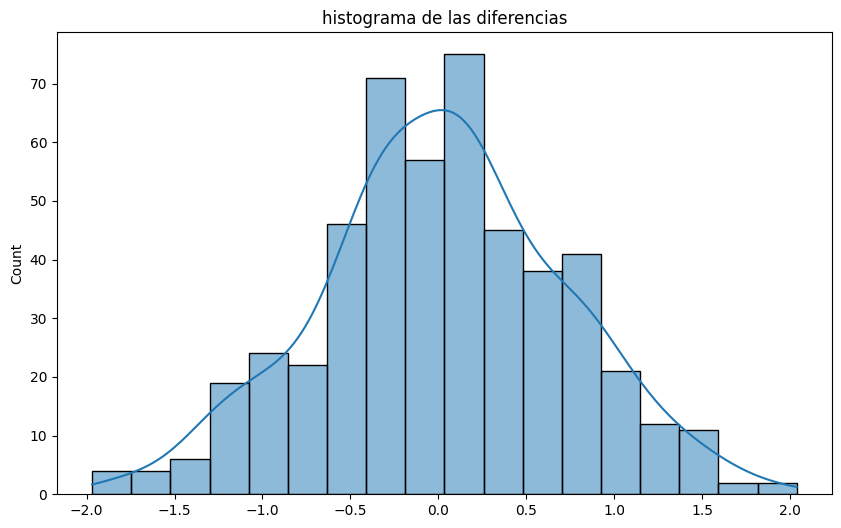

In [95]:
sns.histplot(y_data2-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [96]:
df.loc[len(df)] = [mse, rmse, mae, r2, 20]
df

,MSE,RMSE,MAE,R2,Grado
0,7.712599,2.777157,2.290342,0.237919,1.0
1,1.701234,1.304314,1.094556,0.831901,2.0
2,0.258588,0.508516,0.405735,0.974449,3.0
3,0.258588,0.508516,0.405735,0.974449,4.0
4,0.258588,0.508516,0.405735,0.974449,5.0
5,0.258588,0.508516,0.405735,0.974449,6.0
6,0.258588,0.508516,0.405735,0.974449,7.0
7,0.258588,0.508516,0.405735,0.974449,8.0
8,0.258588,0.508516,0.405735,0.974449,9.0
9,0.258588,0.508516,0.405735,0.974449,10.0


### El modelo sigue perdiendo calidad en las predicciones

# Grafica comparativa de las métricas

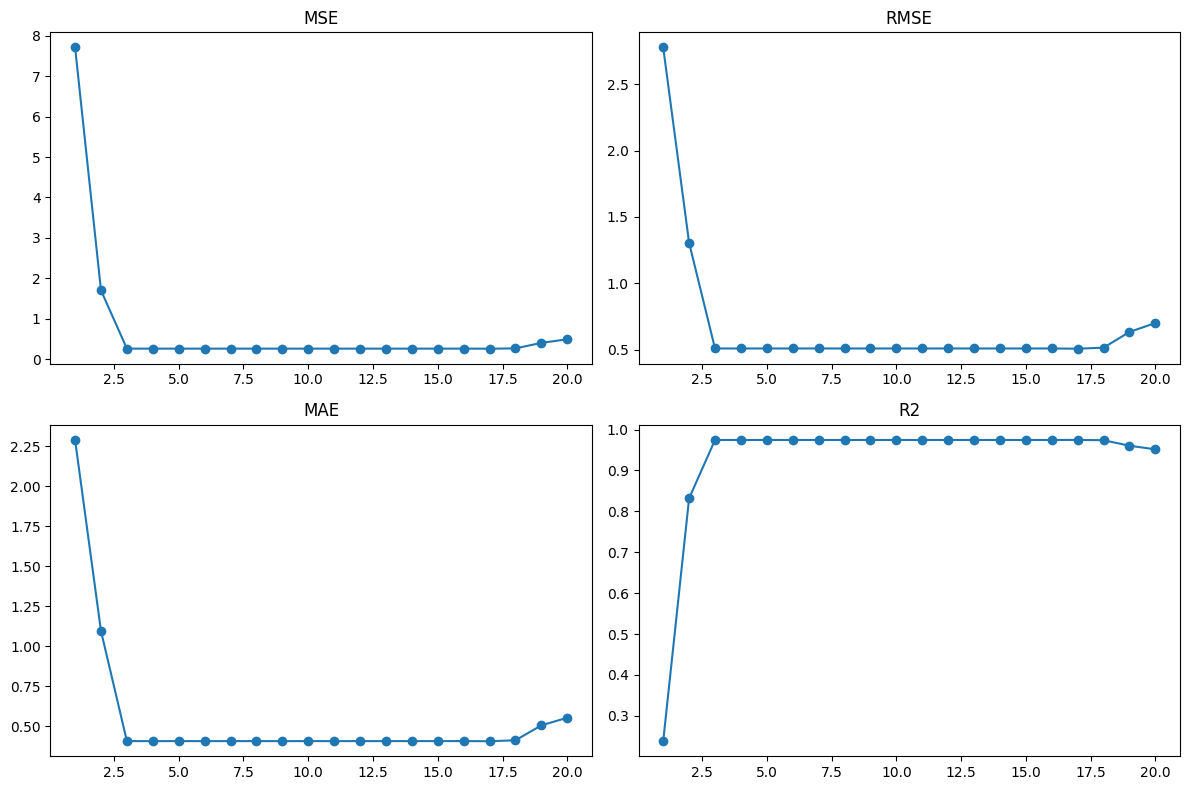

In [99]:
# prompt: Crea una gráfica comparativa del dataframe df que contiene las métricas variando el grado

import matplotlib.pyplot as plt

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the MSE for each degree on the first subplot
axes[0, 0].plot(df['Grado'], df['MSE'], marker='o')
axes[0, 0].set_title('MSE')

# Plot the RMSE for each degree on the second subplot
axes[0, 1].plot(df['Grado'], df['RMSE'],marker='o')
axes[0, 1].set_title('RMSE')

# Plot the MAE for each degree on the third subplot
axes[1, 0].plot(df['Grado'], df['MAE'],marker='o')
axes[1, 0].set_title('MAE')

# Plot the R2 for each degree on the fourth subplot
axes[1, 1].plot(df['Grado'], df['R2'],marker='o')
axes[1, 1].set_title('R2')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
